# QDA and LDA Models

In [1]:
# Import package/module for data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Import modules for feature engineering and modelling
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

from sklearn.metrics import accuracy_score

In [3]:
digits = pd.read_csv("digits.csv") # Read in the data, csv
print("Original dataset shape:", digits.shape)

Original dataset shape: (7291, 257)


In [4]:
# Define X and Y
X = digits.drop("Y", axis = 1) # Remove the response from the other predictor variables
y = digits["Y"] # Only keep the response variable

X.shape # Dimensions of Panda/NumPy type objects
y.shape # Dimensions of Panda/NumPy type objects
# Type of the matrix or vector for response is why '1' does not show

(7291,)

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 50, random_state = 40)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

In [6]:
X_train.sample().to_numpy().reshape(16, 16) # Convert single sample from the training data into a 1616 numpry array

array([[-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  0.187,  0.84 ,
        -0.791, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.796,  0.928,  0.956,
         0.488, -0.947, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.233,  1.   , -0.23 ,
         0.257,  0.277, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.175,  1.   , -0.634,
        -0.934,  0.734, -0.54 , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.183,  1.   , -0.626,
        -0.827,  0.886, -0.288, -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.257,  1.   , -0.596,
         0.092,  1.   , -0.701, -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.597,  1.   , -0.085,
         0.889,  0.426, -0.962, -1.   , -1.   , -1.   , -1

In [7]:
y_train.sample().iloc[0]
# Returns a random sample of one row from the y_train dataframe.
# iloc[0] is then used to get the first value from the returned sample.

7

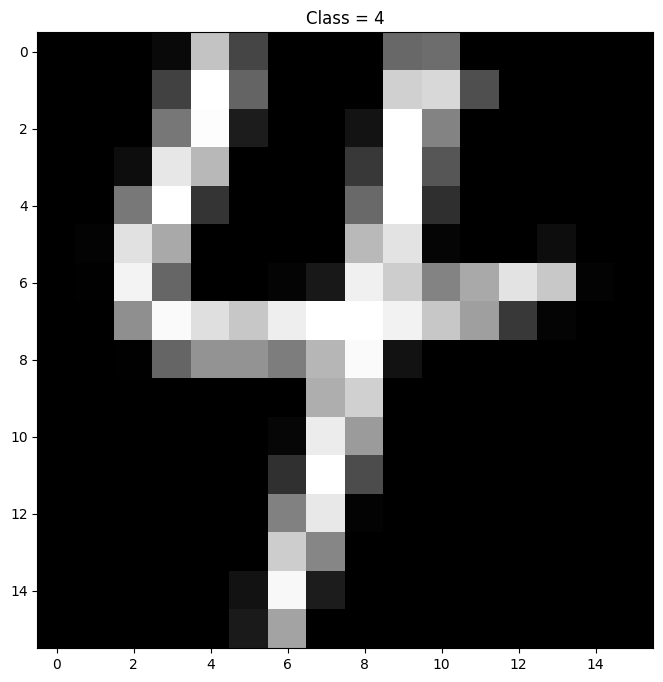

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8)) # Creates a new figure and a single subplot within it.

ax.imshow(X_train.sample(random_state = 234).to_numpy().reshape((16, 16)), cmap = "gray") # Displays the image by taking a 2D array of pixel values and displays it in a grayscale colormap

ax.set_title(f"Class = {y_train.sample(random_state = 234).iloc[0]}") # Sets the title of the subplot to the class label of the randomly selected sample
plt.show()

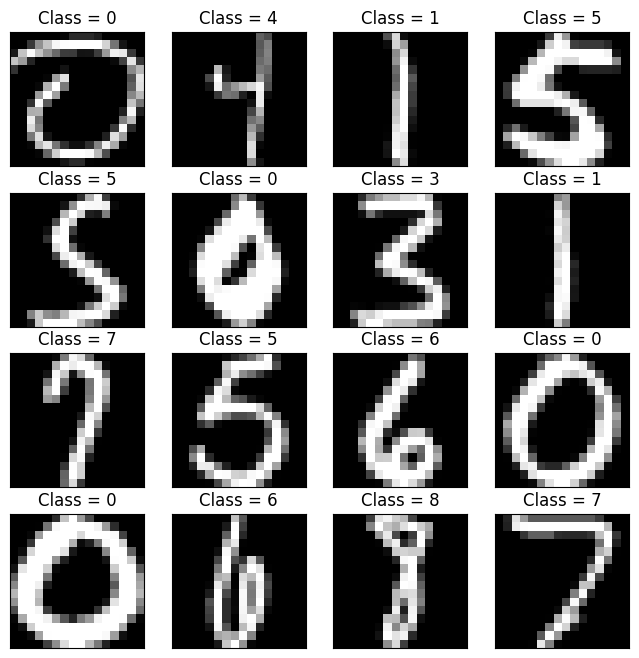

In [9]:
# Plot some figures
fig, ax = plt.subplots(4, 4, figsize=(8, 8)) # Creates a new figure and a single subplot within it.
for i in range(4): # A nested loop ranging from 0 to 3
    for j in range(4):
        ax[i, j].imshow(
            X_train.sample(random_state=2 * i + 10 * j).to_numpy().reshape(16, 16),
            cmap="gray",
        )
        ax[i, j].set_title( # Used to set the title of the subplot, which shows the class label of the image.
            "Class = %s" % (y_train.sample(random_state=2 * i + 10 * j).iloc[0])
        )
        ax[i, j].set_xticks([]) # Remove x-axis ticks
        ax[i, j].set_yticks([]) # Remove y-axis ticks
plt.show()

In [10]:
# --- LDA ---
# LDA is a supervised learning algorithm that is commonly used for dimensionality reduction, as well as for classification.
# The main idea behind LDA is to find a linear combination of the predictors that maximizes the separation between the classes.

# Scale predictors (standardize the predictors to ensure that each predictor is on the same scale)
# The StandardScaler is a preprocessing technique that standardizes features by subtracting the mean and dividing by the standard deviation.
scaler = StandardScaler() # Creates instance of StandardScaler()
scaler.fit(X_train) # Fit it to the training data
X_train_scaled = scaler.transform(X_train) # Standardizes the features in X_train based on the mean and standard deviation calculated in step 2 and assigns the result to the variable X_train_scaled.

# Fit LDA
lda_class = LinearDiscriminantAnalysis() # Creates instance of LinearDiscriminantAnalysis()
lda_class.fit(X_train_scaled, y_train) # Fit it to the training data

# Predict on training data
y_train_pred = lda_class.predict(X_train_scaled) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions
print("LDA --- Accuracy on training data:", np.round(acc, 3))

# Predict on test data
X_test_scaled = scaler.transform(X_test) # Standardizes the features in X_test based on the mean and standard deviation calculated in step 2 and assigns the result to the variable X_test_scaled.
y_test_pred = lda_class.predict(X_test_scaled) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions
print("LDA --- Accuracy on test data:", np.round(acc, 3))

LDA --- Accuracy on training data: 0.939
LDA --- Accuracy on test data: 0.92


In [11]:
# With the pipeline ...
# Define pipeline
pipe_lda = Pipeline(
    [("scaler", StandardScaler()),
     ("lda", LinearDiscriminantAnalysis())]
)
# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LinearDiscriminantAnalysis: Performs linear discriminant analysis, a technique for dimensionality reduction and classification.
#  It aims to find a lower-dimensional representation of the data that maximizes the separation between different classes in the data.

# Fit pipeline
pipe_lda.fit(X_train, y_train) # Fit it to the training data

# Predict on training data
y_train_pred = pipe_lda.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions
print("LDA --- Accuracy on training data:", np.round(acc, 3))

# Predict on test data
y_test_pred = pipe_lda.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions
print("LDA --- Accuracy on test data:", np.round(acc, 3))

LDA --- Accuracy on training data: 0.939
LDA --- Accuracy on test data: 0.92


In [12]:
pipe_lda["lda"].means_.shape # Shape of the matrix

(10, 256)

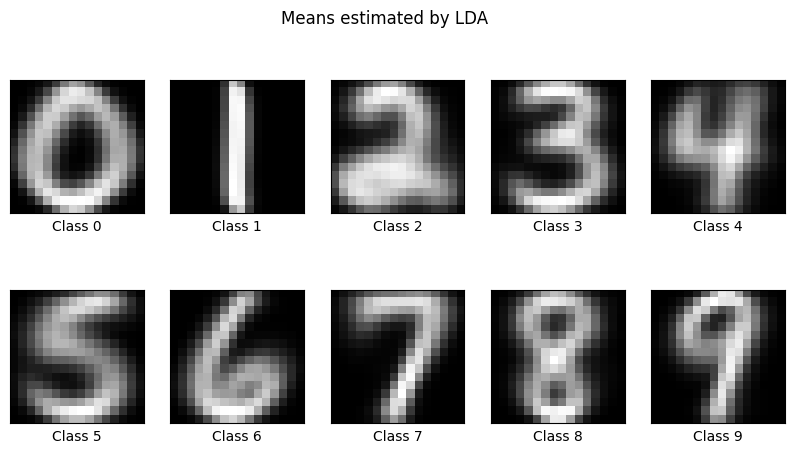

In [13]:
# Plot means
# X_scaled = (X - mean(X)) / sd(X)
# X = X_scaled * sd(X) + mean(X)

n, d = X.shape
# n represents the number of samples in the dataset
# d represents the number of features

means = pipe_lda["lda"].means_.copy() * np.sqrt(pipe_lda["scaler"].var_) + pipe_lda["scaler"].mean_.reshape(1, d)
# The means are computed by multiplying the means estimated by LDA (pipe_lda["lda"].means_) with the square root of the variances computed by the scaler (pipe_lda["scaler"].var_) and then adding the means computed by the scaler (pipe_lda["scaler"].mean_).
# This operation is performed to transform the means back to their original scale before normalization by the scaler.

plt.figure(figsize=(10, 5)) # Figure dimensions
for i in range(10): # Loop for 10 times, 0 to 9
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(means[i].reshape(16, 16), cmap = "gray") # Displays the image by taking a 2D array of pixel values and displays it in a grayscale colormap
    l1_plot.set_xticks(()) # Remove x-axis ticks
    l1_plot.set_yticks(()) # Remove y-axis ticks
    l1_plot.set_xlabel(f"Class {i}") # Used to set the title of the subplot, which shows the class label of each image.
plt.suptitle("Means estimated by LDA") # Title for the entire output
plt.show()

In [14]:
# --- QDA ---
# A classification algorithm that assumes the data follows a Gaussian distribution and estimates separate covariance matrices for each class.
# It is a type of discriminant analysis that is particularly useful when the classes have non-linear decision boundaries.

# Define pipeline
pipe_qda = Pipeline(
    [("scaler", StandardScaler()),
     ("qda", QuadraticDiscriminantAnalysis())]
)
# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. QuadraticDiscriminantAnalysis: This step fits a QDA model to the scaled data.

# Fit pipeline
pipe_qda.fit(X_train, y_train) # Fit it to the training data

C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Pipeline(steps=[('scaler', StandardScaler()),
                ('qda', QuadraticDiscriminantAnalysis())])

In [15]:
# Add noise before fitting again
def add_noise(X, scale):
    """
    DataFrame double -> ndarray
    produce DataFrame adding Gaussian with standard deviation = `scale` to each column of `X`.
    """
    # Transform to ndarray
    X_arr = X.to_numpy()

    # Get shape
    n, d = X_arr.shape

    # Add Gaussian noise
    X_arr = X_arr + np.random.normal(scale = scale, size = (n, d))

    # Back to DataFrame
    df = pd.DataFrame(X_arr, columns = ["X" + str(i) for i in range(1, d + 1)])

    # Return df
    return df

X_train_noise = add_noise(X_train, scale = 0.1) # Add random noise to the input and controls the amount of the noise added
pipe_qda.fit(X_train_noise, y_train) # Fit it to the training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('qda', QuadraticDiscriminantAnalysis())])

In [16]:
# Predict on training data
y_train_pred = pipe_qda.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions
print("QDA --- Accuracy on training data:", np.round(acc, 3))

# Predict on test data
y_test_pred = pipe_qda.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions
print("QDA --- Accuracy on test data:", np.round(acc, 3))

QDA --- Accuracy on training data: 0.993
QDA --- Accuracy on test data: 0.94


In [17]:
def plot_mean(means, method_name):
    """
    ndarray string -> plot
    plot the mean vectors estimated by LDA/QDA
    """
    plt.figure(figsize=(10, 5)) # Figure dimensions
    scale = np.abs(means).max() # Loop for 10 times, 0 to 9
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(means[i].reshape(16, 16), cmap="gray")
        l1_plot.set_xticks(()) # Remove x-axis ticks
        l1_plot.set_yticks(()) # Remove y-axis ticks
        l1_plot.set_xlabel("Class %i" % i) # Used to set the title of the subplot, which shows the class label of each image.
    plt.suptitle("Means estimated by " + method_name) # Title for the entire output
    plt.show()

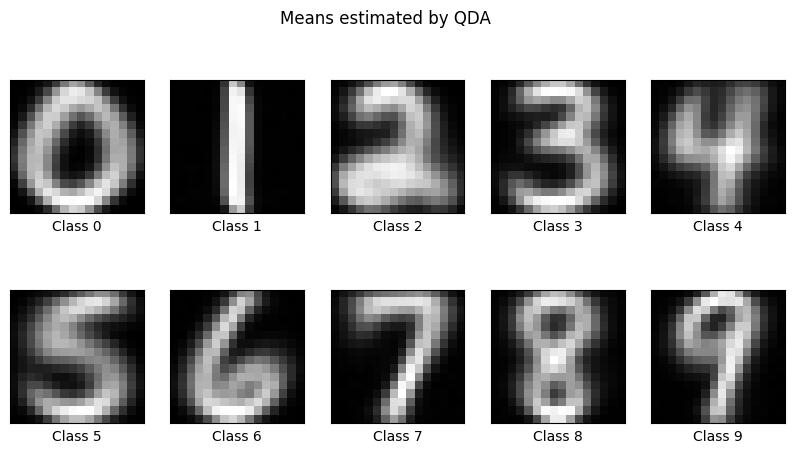

In [18]:
# Plot means
means = pipe_qda["qda"].means_.copy() * np.sqrt(pipe_qda["scaler"].var_) + pipe_qda["scaler"].mean_.reshape(1, d)
plot_mean(means, "QDA")
# The means are computed by multiplying the means estimated by LDA (pipe_lda["lda"].means_) with the square root of the variances computed by the scaler (pipe_lda["scaler"].var_) and then adding the means computed by the scaler (pipe_lda["scaler"].mean_).
# This operation is performed to transform the means back to their original scale before normalization by the scaler.